In [2]:
# Importing dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# Locate data
city = os.path.join('raw_data', 'city_data.csv')
ride = os.path.join('raw_data', 'ride_data.csv')

# Read/ show data
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)
#ride_df
#city_df

# Merge data
df = ride_df.merge(city_df, on='city', how='left')
df_city = df.set_index('city')
df_city.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


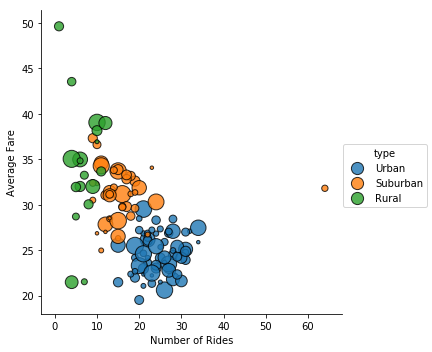

In [77]:
# Average fair/ city
# Group data by city
city_group_df = df_city.groupby('city')

# Calculate mean fare
avg_fare = city_group_df['fare'].mean()
avg_fare = avg_fare.to_frame()
avg_fare = avg_fare.rename(columns={'fare':'Average Fare'})

avg_fare

# Calculate # of rides/ city
city_rides = df['city'].value_counts()
city_rides = city_rides.to_frame()
city_rides = city_rides.rename(columns={'city':'Number of Rides'})
city_rides.index.names = ['city']
city_rides.head()

# Total num of drivers/ city
city_drivers = city_group_df['driver_count'].max()
city_drivers = city_drivers.to_frame()
city_drivers = city_drivers.rename(columns={'driver_count':'Number of Drivers'})
city_drivers.head()

# City and type of city
city_type = city_group_df['type'].max()
city_type = city_type.to_frame()
city_type.head()

# Merge data
merge1 = avg_fare.merge(city_drivers, left_index=True, right_index=True)
merge2 = merge1.merge(city_rides, left_index=True, right_index=True)
merge3 = merge2.merge(city_type, left_index=True, right_index=True)
merge3.head()

# Drivers
drivers = city_drivers['Number of Drivers']

# Plot city, average fare, number of drivers, number of rides]
sns.lmplot('Number of Rides','Average Fare', data=merge3, fit_reg=False, hue='type', scatter_kws={'s': drivers*4, 'edgecolors':'black'})


In [71]:
merge3.head()

# ### % of Total Fares by City Type
# # grouping by city type
# g_city = df.groupby('type')

# # Calculating city fare totals by type
# city_fare = g_city['fare'].sum()
# city_fare = city_fare.to_frame()
# total_city_fare = city_fare['fare'].sum()
# city_fare['fare percentage'] = city_fare['fare']/ total_city_fare
# city_fare

# ### % of Total Rides by City Type


# ### % of Total Drivers by City Type

,Average Fare,Number of Drivers,Number of Rides,type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban
